In [1]:
from sklearn import metrics

In [3]:
#1.	Chargez votre ensemble de données
import pandas as pd

Dclient=pd.read_csv("CC_GENERAL.csv")

Dclient.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
Dclient.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
## On utilise la moyenne pour ramplacer les valeurs manquantes pour la variable Year
Dclient['CREDIT_LIMIT'].fillna(Dclient['CREDIT_LIMIT'].mean(), inplace=True)
Dclient['MINIMUM_PAYMENTS'].fillna(Dclient['MINIMUM_PAYMENTS'].mean(), inplace=True)
Dclient

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
Dclient=Dclient.drop("CUST_ID",axis=1)
Dclient

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
from sklearn import preprocessing

transformer = preprocessing.MinMaxScaler().fit(Dclient[['BALANCE']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['PURCHASES']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['ONEOFF_PURCHASES']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['INSTALLMENTS_PURCHASES']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['CASH_ADVANCE']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['CASH_ADVANCE_TRX']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['PURCHASES_TRX']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['CREDIT_LIMIT']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['PAYMENTS']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['MINIMUM_PAYMENTS']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['PRC_FULL_PAYMENT']])
transformer = preprocessing.MinMaxScaler().fit(Dclient[['TENURE']])




In [26]:
#d = preprocessing.MinMaxScaler().fit_transform(Dclient)
#tenure = Dclient['TENURE']
#Dclient.drop('TENURE', axis=1, inplace=True)
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(Dclient)
scaled_df = pd.DataFrame(d, columns=Dclient.columns)
new_df = scaled_df.join(tenure)
new_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,12
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,12
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,12
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,12
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,12


In [27]:
#2.	Utilisez le clustering hiérarchique pour identifier les regroupements inhérents au sein de vos données.

##Types de clustering agglomératifs

from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

clust_labels=model.fit_predict(new_df)


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [64]:
#2.	Utilisez le clustering hiérarchique pour identifier les regroupements inhérents au sein de vos données.

##Types de clustering agglomératifs

from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')

clust_labels=model.fit_predict(new_df)


In [65]:
new_df1=pd.DataFrame(clust_labels)
new_df1

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,1
8946,1
8947,1
8948,1


In [ ]:
# BALANCE_FREQUENCY : fréquence de mise à jour du solde, score compris entre 0 et 1 

# ONEOFF_PURCHASES : montant maximum d'achat effectué en une seule fois

#  INSTALLMENTS_PURCHASES : montant de l'achat effectué en plusieurs fois

# PURCHASES_FREQUENCY : fréquence à laquelle les achats sont effectués, score compris entre 0 et 1

# PURCHASES_FREQUENCY : fréquence à laquelle les achats sont effectués, score compris entre 0 et 1

# ONEOFFPURCHASESFREQUENCY : la fréquence à laquelle les achats ont lieu en une seule fois (1 = achats fréquents, 0 = achats peu fréquents)

# PURCHASESINSTALLMENTSFREQUENCY : la fréquence des achats en plusieurs fois (1 = fréquemment effectués, 0 = peu fréquents)

#

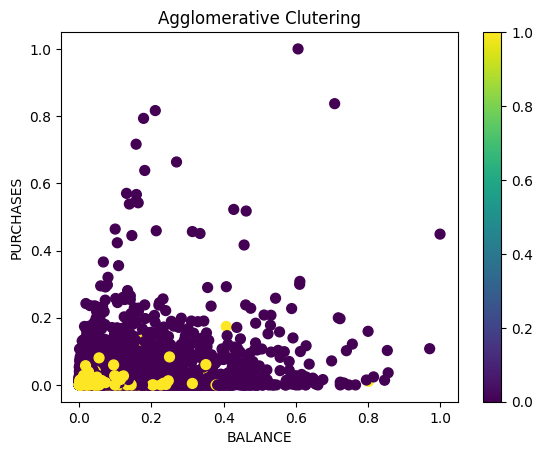

In [66]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (new_df['BALANCE'] ,new_df["PURCHASES"] , c= new_df1[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

{'whiskers': [<matplotlib.lines.Line2D at 0x19f0c010d30>,
 'caps': [<matplotlib.lines.Line2D at 0x19f0c011270>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f0c010a90>],
 'medians': [<matplotlib.lines.Line2D at 0x19f0c0117b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f0c011a50>],
 'means': []}

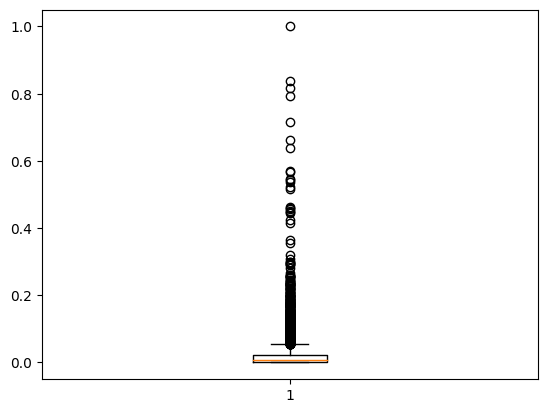

In [72]:
import matplotlib.pyplot as plt
plt.boxplot(new_df["PURCHASES"])

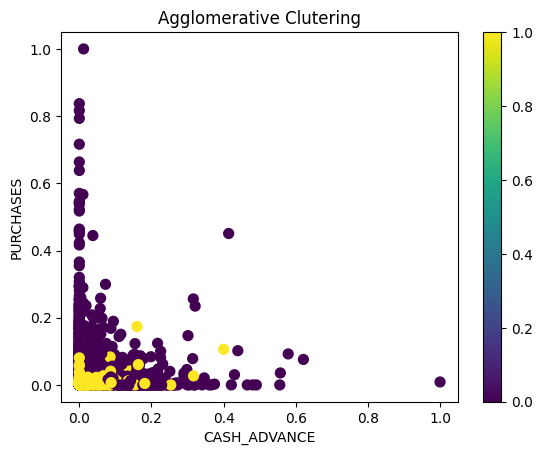

In [73]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (new_df['CASH_ADVANCE'] ,new_df["PURCHASES"] , c= new_df1[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("CASH_ADVANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

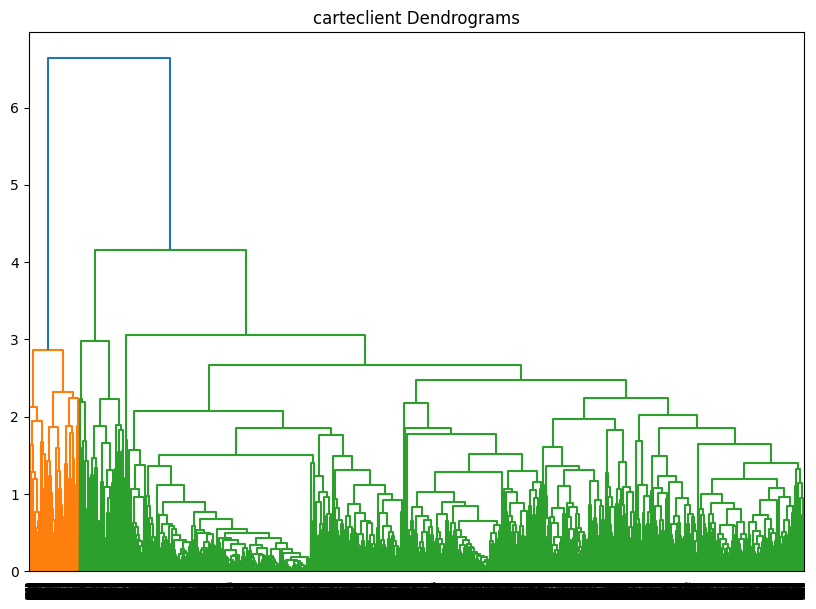

In [77]:
#4.	Tracez le dendrogramme. Utilisez le clustering k-means. 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("carteclient Dendrograms")
dend=shc.dendrogram(shc.linkage(new_df, method="complete"))
plt.show()

In [78]:
#Utilisez le clustering k-means. 

from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(new_df)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [79]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,2
2,0
3,2
4,2
...,...
8945,1
8946,1
8947,1
8948,1


In [80]:
kmeans.predict(new_df)
print(kmeans.cluster_centers_)

[[7.71074565e-02 9.42744712e-01 3.92832599e-02 2.60383721e-02
  3.84657959e-02 1.17558627e-02 8.96598586e-01 3.51334077e-01
  7.32348736e-01 4.96567949e-02 1.56965179e-02 8.47023523e-02
  1.70219859e-01 4.29788854e-02 1.20987020e-02 2.48944488e-01
  1.19328298e+01]
 [5.68126154e-02 7.90766693e-01 9.53347557e-03 6.84894106e-03
  8.38836892e-03 2.95049330e-02 4.27222740e-01 1.29627025e-01
  2.90961205e-01 1.42198345e-01 3.28816621e-02 1.68437580e-02
  9.46063824e-02 1.58571085e-02 6.02217591e-03 1.68604622e-01
  7.44705882e+00]
 [9.06613610e-02 8.37847661e-01 6.73837103e-03 6.32392784e-03
  3.23889385e-03 2.67327373e-02 1.64832750e-01 9.16561344e-02
  7.24234299e-02 1.14671934e-01 3.41797478e-02 9.12655540e-03
  1.39518108e-01 3.00059076e-02 1.15613127e-02 7.23372825e-02
  1.18686914e+01]]


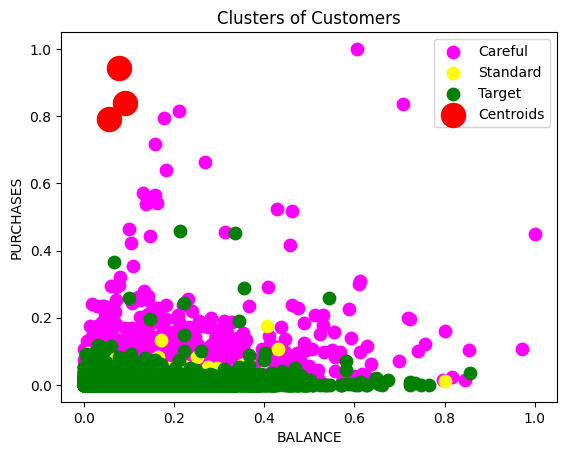

In [88]:
#Tracez les grappes. 
plt.scatter(new_df["BALANCE"][kmeans.labels_== 0],          
            new_df["PURCHASES"][kmeans.labels_== 0],s=80,c='magenta',label='Careful')
plt.scatter(new_df["BALANCE"][kmeans.labels_== 1],
           new_df["PURCHASES"][kmeans.labels_== 1],s=80,c='yellow',label='Standard')
plt.scatter(new_df["BALANCE"][kmeans.labels_== 2],
           new_df["PURCHASES"][kmeans.labels_== 2],s=80,c='green',label='Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()